In [13]:
import openseespy.opensees as ops
import openseespy.postprocessing.ops_vis as opsv
import matplotlib.pyplot as plt
# import opensees as ops  # local compilation
# import ops_vis as opsv  # local

In [14]:
ft = 12.
B,H = 30*ft, 13.*ft

def f(E1, E2, Px):
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 3)

    Acol, Agir = 576.0, 684.0
    IzCol, IzGir = 27_648.0, 34_383.8

    E = 3600.

    Ep = {1: [E, Acol, IzCol],
          2: [E, Acol, IzCol],
          3: [E, Agir, IzGir]}

    ops.node(1, 0., 0.)
    ops.node(2, 0., H)
    ops.node(3, B,  0.)
    ops.node(4, B,  H)

    ops.fix(1, 1, 1, 1)
    ops.fix(3, 1, 1, 1)

    ops.geomTransf('Linear', 1)

    # columns
    ops.element('elasticBeamColumn', 1, 1, 2, Acol, E, IzCol, 1)
    ops.element('elasticBeamColumn', 2, 3, 4, Acol, E, IzCol, 1)
    # girder
    ops.element('elasticBeamColumn', 3, 2, 4, Agir, E, IzGir, 1)

    Px = 2.e+3
    Wy = -10.e+3
    Wx = 0.

    Ew = {3: ['-beamUniform', Wy, Wx]}

    ops.timeSeries('Constant', 1)
    ops.pattern('Plain', 1, 1)
    ops.load(2, Px, 0., 0.)

    # for etag in Ew:
    #     ops.eleLoad('-ele', etag, '-type', Ew[etag][0], Ew[etag][1],
    #                 Ew[etag][2])

    ops.constraints('Transformation')
    ops.numberer('RCM')
    ops.numberer('Plain')
    ops.system('BandGeneral')
    ops.test('NormDispIncr', 1.0e-6, 6, 2)
    ops.algorithm('Linear')
    ops.integrator('LoadControl', 1)
    ops.analysis('Static')
    ops.analyze(1)

ops.printModel()

Current Domain Information
	Current Time: 1
tCommitted Time: 1
NODE DATA: NumNodes: 4

numComponents: 4
 Node: 1
	Coordinates  : 0 0 
	Disps: 0 0 0 
	 unbalanced Load: 0 0 0 
	ID : -1 -1 -1 


 Node: 2
	Coordinates  : 0 156 
	Disps: 5.51163 0.0248715 -0.0295316 
	 unbalanced Load: 2000 0 0 
	ID : 3 4 5 


 Node: 3
	Coordinates  : 360 0 
	Disps: 0 0 0 
	 unbalanced Load: 0 0 0 
	ID : -1 -1 -1 


 Node: 4
	Coordinates  : 360 156 
	Disps: 5.36679 -0.0248715 -0.0284346 
	 unbalanced Load: 0 0 0 
	ID : 0 1 2 

ELEMENT DATA: NumEle: 3

numComponents: 3
ElasticBeam2d: 1
	Connected Nodes: 1 2 
	CoordTransf: 1
	mass density:  0, cMass: 0
	release code:  0
	End 1 Forces (P V M): -330.599 1009.32 97569.3
	End 2 Forces (P V M): 330.599 -1009.32 59885.1

ElasticBeam2d: 2
	Connected Nodes: 3 4 
	CoordTransf: 1
	mass density:  0, cMass: 0
	release code:  0
	End 1 Forces (P V M): 330.599 990.677 95415
	End 2 Forces (P V M): -330.599 -990.677 59130.7

ElasticBeam2d: 3
	Connected Nodes: 2 4 
	CoordTrans

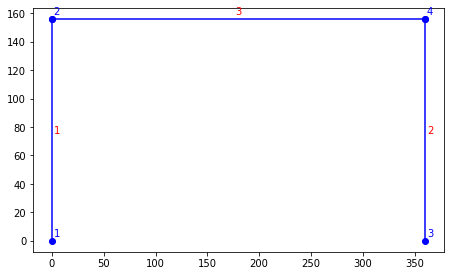

In [15]:
# 1. plot model with tag lebels

szer, wys = 16., 10.

fig = plt.figure(figsize=(szer/2.54, wys/2.54))
fig.subplots_adjust(left=.08, bottom=.08, right=.985, top=.94)
ax1 = plt.subplot(111)

opsv.plot_model()

10.0

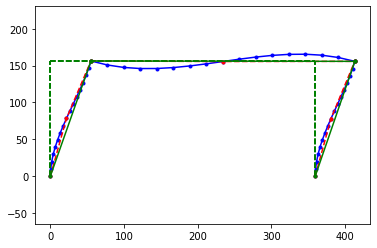

In [19]:
# 2. plot deformed model
sfac = 10.

plt.figure()
# plot_defo with optional arguments
# sfac = opsv.plot_defo()
opsv.plot_defo(sfac, fmt_interp='b.-')
opsv.plot_defo(sfac, 5, interpFlag=0, fmt_nodes='bo-')
opsv.plot_defo(sfac, 3, endDispFlag=0, fmt_interp='r.--')
opsv.plot_defo(sfac, 2, fmt_interp='g.-')

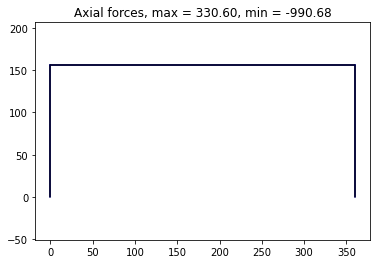

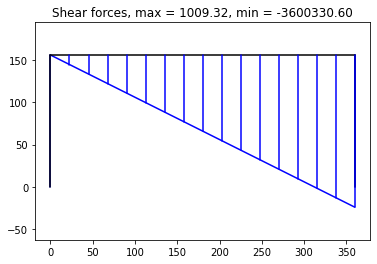

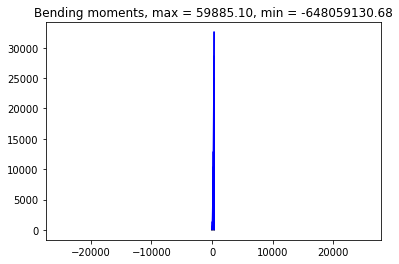

In [17]:
# print(f'sfac: {sfac}')  # return sfac if automatically calculated

# 3. plot N, V, M forces diagrams

sfacN, sfacV, sfacM = 5.e-5, 5.e-5, 5.e-5

plt.figure()
minVal, maxVal = opsv.section_force_diagram_2d('N', Ew, sfacN)
plt.title(f'Axial forces, max = {maxVal:.2f}, min = {minVal:.2f}')

plt.figure()
minVal, maxVal = opsv.section_force_diagram_2d('T', Ew, sfacV)
plt.title(f'Shear forces, max = {maxVal:.2f}, min = {minVal:.2f}')

plt.figure()
minVal, maxVal = opsv.section_force_diagram_2d('M', Ew, sfacM)
plt.title(f'Bending moments, max = {maxVal:.2f}, min = {minVal:.2f}')

plt.show()